In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [ ]:
# Load the dataset
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data", header=None)

In [ ]:
print(data.columns)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57],
           dtype='int64')


In [ ]:
# Set column names
column_names = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over",
                "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive",
                "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free",
                "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", "word_freq_your",
                "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl",
                "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet",
                "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology",
                "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs",
                "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu",
                "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!",
                "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest",
                "capital_run_length_total", "is_spam"]

# Set the column names of the dataframe
data.columns = column_names

In [ ]:
data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:
# check the shape of the dataframe before removing duplicates
print('Before removing duplicates:', data.shape)

# remove duplicates and keep the first occurrence
data = data.drop_duplicates()

# check the shape of the dataframe after removing duplicates
print('After removing duplicates:', data.shape)

Before removing duplicates: (4601, 58)
After removing duplicates: (4210, 58)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4210 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4210 non-null   float64
 1   word_freq_address           4210 non-null   float64
 2   word_freq_all               4210 non-null   float64
 3   word_freq_3d                4210 non-null   float64
 4   word_freq_our               4210 non-null   float64
 5   word_freq_over              4210 non-null   float64
 6   word_freq_remove            4210 non-null   float64
 7   word_freq_internet          4210 non-null   float64
 8   word_freq_order             4210 non-null   float64
 9   word_freq_mail              4210 non-null   float64
 10  word_freq_receive           4210 non-null   float64
 11  word_freq_will              4210 non-null   float64
 12  word_freq_people            4210 non-null   float64
 13  word_freq_report            4210 

In [ ]:
#cleaning the data set 
data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [ ]:
#data.groupby('is_spam').mean()

In [ ]:
# Split the dataset into features and target variable
X = data.drop(['is_spam'], axis=1)
y = data['is_spam']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (2947, 57)
Shape of y_train: (2947,)
Shape of X_test: (1263, 57)
Shape of y_test: (1263,)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Check if either X_train or y_train is empty or None
print("X_train:", X_train)
print("y_train:", y_train)


Shape of X_train: (2947, 57)
Shape of y_train: (2947,)
Shape of X_test: (1263, 57)
Shape of y_test: (1263,)
X_train:       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
408             0.00               0.00           0.00          0.42   
3761            0.00               0.00           0.00          0.00   
2357            0.00               0.00           0.00          0.00   
4548            0.00               0.00           0.97          0.00   
1190            0.00               0.56           0.56          0.00   
...              ...                ...            ...           ...   
3814            0.00               0.00           0.00          0.00   
510             0.32               0.28           0.57          0.00   
3343            0.00               0.00           0.00          0.00   
4153            0.00               0.00           0.00          0.00   
919             0.00               0.00           0.24          0.00   

      word_freq_ou

In [ ]:
# Train a decision tree classifier
#dtc = DecisionTreeClassifier(random_state=42)
#dtc.fit(X_train, y_train)

clf = DecisionTreeClassifier(random_state=42,criterion='gini')
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
predictions_test=clf.predict(X_test)
# Make predictions on the testing set
y_pred = clf.predict(X_test)

In [ ]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8962787015043547


In [ ]:
#Checking accuracy of training dataset
predictions_train = clf.predict(X_train)
accuracy_score(y_train,predictions_train)

0.999321343739396

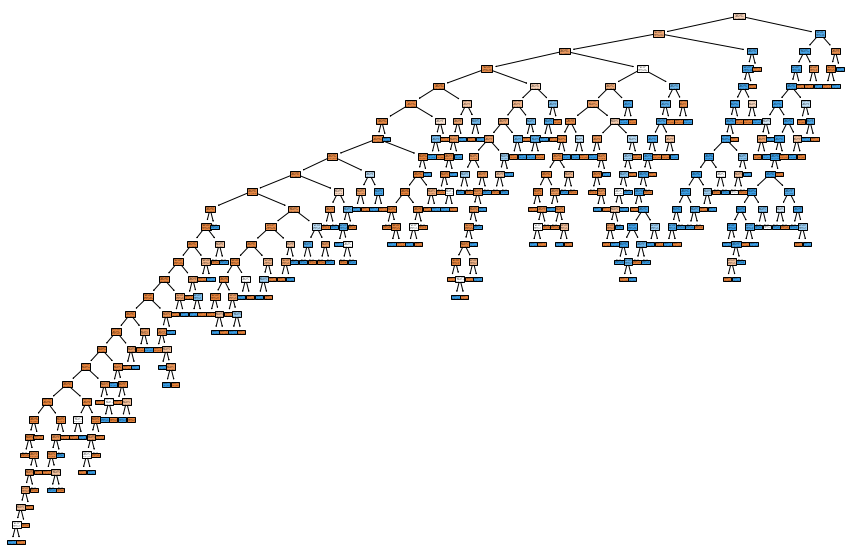

In [ ]:
#Visualizing final decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

In [ ]:
#Evaluating test dataset
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions_test))
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       740
           1       0.88      0.86      0.87       523

    accuracy                           0.90      1263
   macro avg       0.89      0.89      0.89      1263
weighted avg       0.90      0.90      0.90      1263

Confusion matrix:
 [[680  60]
 [ 71 452]]


In [ ]:
#Evaluating training dataset
print(classification_report(y_train,predictions_train))
cm_train = confusion_matrix(y_train, predictions_train)
print("Confusion matrix for training corpus:\n", cm_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1791
           1       1.00      1.00      1.00      1156

    accuracy                           1.00      2947
   macro avg       1.00      1.00      1.00      2947
weighted avg       1.00      1.00      1.00      2947

Confusion matrix for training corpus:
 [[1791    0]
 [   2 1154]]


In [ ]:
#Finding false positive rate and true positive rate
from sklearn.metrics import roc_curve,auc
dt_probs = clf.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test,dt_probs)

In [ ]:
#Plotting ROC curve for our Decision Tree
auc_score_dt = auc(fpr_dt,tpr_dt)
auc_score_dt

0.8915818303963619

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,8))
    plt.plot(fpr_dt, tpr_dt, color='orange', label='AUC = %0.2f' % auc_score_dt)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

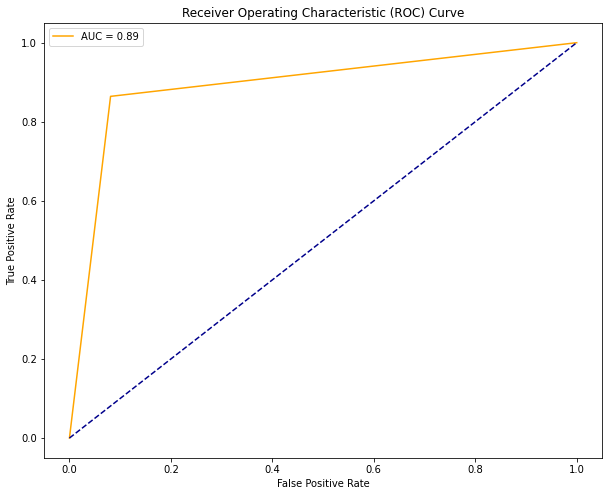

In [ ]:
plot_roc_curve(fpr_dt,tpr_dt)

In [ ]:
#Pruning of the decision tree
# Determine the range of ccp_alpha values to explore
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

In [ ]:
for ccp_alpha, impurity in zip(ccp_alphas, impurities):
    print("ccp_alpha: {:.4f}   Total impurity: {:.4f}".format(ccp_alpha, impurity))

ccp_alpha: 0.0000   Total impurity: 0.0007
ccp_alpha: 0.0001   Total impurity: 0.0014
ccp_alpha: 0.0001   Total impurity: 0.0015
ccp_alpha: 0.0002   Total impurity: 0.0016
ccp_alpha: 0.0002   Total impurity: 0.0023
ccp_alpha: 0.0002   Total impurity: 0.0030
ccp_alpha: 0.0002   Total impurity: 0.0057
ccp_alpha: 0.0003   Total impurity: 0.0070
ccp_alpha: 0.0003   Total impurity: 0.0076
ccp_alpha: 0.0003   Total impurity: 0.0082
ccp_alpha: 0.0003   Total impurity: 0.0089
ccp_alpha: 0.0003   Total impurity: 0.0095
ccp_alpha: 0.0003   Total impurity: 0.0102
ccp_alpha: 0.0003   Total impurity: 0.0109
ccp_alpha: 0.0003   Total impurity: 0.0128
ccp_alpha: 0.0003   Total impurity: 0.0135
ccp_alpha: 0.0003   Total impurity: 0.0162
ccp_alpha: 0.0003   Total impurity: 0.0168
ccp_alpha: 0.0003   Total impurity: 0.0175
ccp_alpha: 0.0003   Total impurity: 0.0182
ccp_alpha: 0.0003   Total impurity: 0.0185
ccp_alpha: 0.0003   Total impurity: 0.0192
ccp_alpha: 0.0004   Total impurity: 0.0208
ccp_alpha: 

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

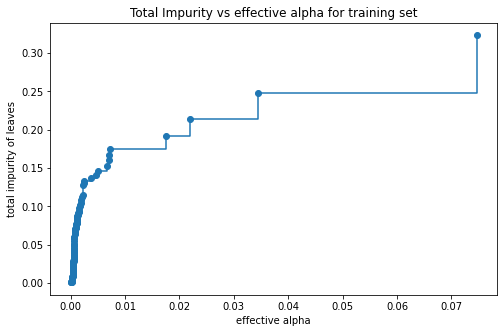

In [ ]:
#Visualizing alpha w.r.t impurity of leaves
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.15377747739247039


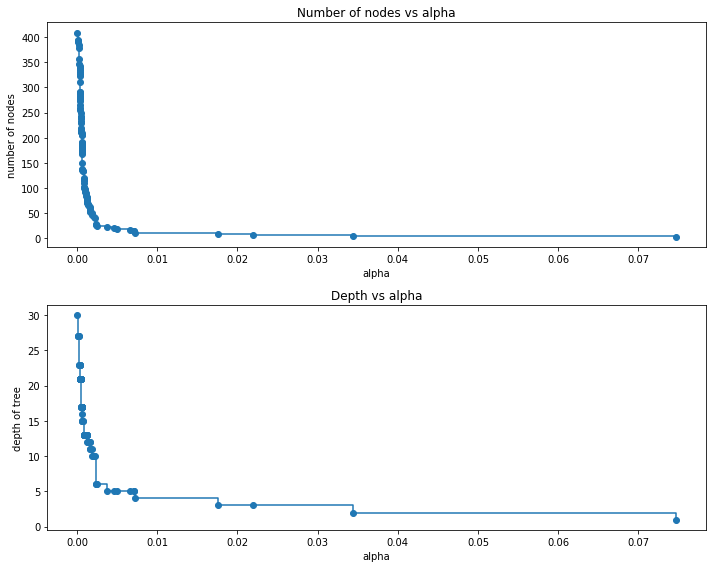

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,8))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

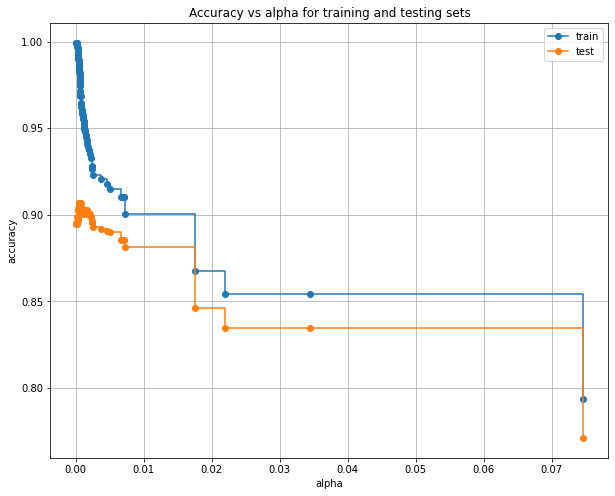

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

In [ ]:
#Accuracy after pruning 
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.016, random_state=0)

In [ ]:
#Accuracy of test dataset
from sklearn.metrics import accuracy_score
pred=clf.predict(X_test)
accuracy_score(y_test, pred)

0.8812351543942993

In [ ]:
#Accuracy of training dataset
pred_1 = clf.predict(X_train)
accuracy_score(y_train,pred_1)

0.9002375296912114

[Text(0.5555555555555556, 0.9, 'x[52] <= 0.056\ngini = 0.477\nsamples = 2947\nvalue = [1791, 1156]'),
 Text(0.3333333333333333, 0.7, 'x[6] <= 0.065\ngini = 0.358\nsamples = 2219\nvalue = [1701, 518]'),
 Text(0.2222222222222222, 0.5, 'x[51] <= 0.241\ngini = 0.268\nsamples = 1999\nvalue = [1680, 319]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.155\nsamples = 1635\nvalue = [1497, 138]'),
 Text(0.3333333333333333, 0.3, 'x[56] <= 68.5\ngini = 0.5\nsamples = 364\nvalue = [183, 181]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.37\nsamples = 192\nvalue = [145, 47]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.344\nsamples = 172\nvalue = [38, 134]'),
 Text(0.4444444444444444, 0.5, 'gini = 0.173\nsamples = 220\nvalue = [21, 199]'),
 Text(0.7777777777777778, 0.7, 'x[24] <= 0.4\ngini = 0.217\nsamples = 728\nvalue = [90, 638]'),
 Text(0.6666666666666666, 0.5, 'gini = 0.124\nsamples = 678\nvalue = [45, 633]'),
 Text(0.8888888888888888, 0.5, 'gini = 0.18\nsamples = 50\nvalue = [45, 5]')]

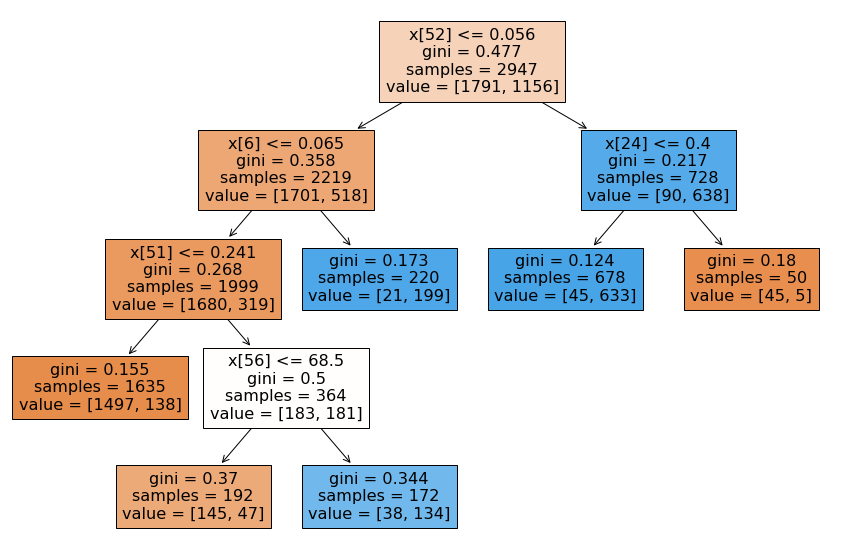

In [ ]:
#Visualizing after pruning
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)